In [1]:
import numpy as np
import pylab
import time
from pathlib import Path
import numpy as np
from PyBoltz.PyBoltzRun import *

In [2]:

### Simulation for Pressure range
Pressure = np.arange(750.062,8250.68,750.062)

In [3]:
# Set up helper object
PBRun=PyBoltzRun()

In [4]:
# Show list of available gases
PBRun.ListGases()

CF4 1
ARGON 2
HELIUM4 3
HELIUM3 4
NEON 5
KRYPTON 6
XENON 7
CH4 8
ETHANE 9
PROPANE 10
ISOBUTANE 11
CO2 12
H2O 14
OXYGEN 15
NITROGEN 16
HYDROGEN 21
DEUTERIUM 22
DME 25


In [5]:
# Configure settings for our simulation
MySettings   ={'Gases'                 :['XENON'],
               'Fractions'             :[100],
               'Max_collisions'        :4e7,
               'EField_Vcm'            :500,
               'Max_electron_energy'   :0,
               'Temperature_C'         :23,
               'Pressure_Torr'         :7500.62,
               'BField_Tesla'          :0,
               'BField_angle'          :0,
               'Angular_dist_model'    :1,
               'Enable_penning'        :0,
               'Enable_thermal_motion' :1,
               'ConsoleOutputFlag'     :0}

In [6]:
# Create empty lists to store outputs
DriftVels=[]
DriftVels_err=[]
DTs=[]
DLs=[]
DT1s=[]
DL1s=[]
DTs_err=[]
DLs_err=[]
DT1s_err=[]
DL1s_err=[]


In [7]:

# Run for each E field

#EFields=[436.7,476.2,20000]
EFields=[100,300,500]

DriftVel={}
DriftVelErr={}
DT={}
DT_err={}
DL={}
DL_err={}


for E in  EFields:
    DriftVel[E]=np.array([])
    DriftVelErr[E]=np.array([])
    DT[E]=np.array([])
    DT_err[E]=np.array([])
    DL[E]=np.array([])
    DL_err[E]=np.array([])
t1=time.time()
for E in EFields:
    for P in Pressure:
        print("Running with E Field " +str(E) + " V/cm With Pressure " + str(P) + " tor")

        MySettings['EField_Vcm']=E
        MySettings['Pressure_Torr']=P
        Output=PBRun.Run(MySettings)

        DriftVel[E]=np.append(DriftVel[E],Output['Drift_vel'].val[2])
        DriftVelErr[E]=np.append(DriftVelErr[E],Output['Drift_vel'].err[2])

        DT[E]=np.append(DT[E],Output['DT'].val)
        DT_err[E]=np.append(DT_err[E],Output['DT'].err)

        DL[E]=np.append(DL[E],Output['DT'].val)
        DL_err[E]=np.append(DL_err[E],Output['DT'].err)

t2=time.time()

print("Time elapsed:" +str(t2-t1))

Running with E Field 100 V/cm With Pressure 750.062 tor
Input Decor_Colls not set, using default 0
Input Decor_LookBacks not set, using default 0
Input Decor_Step not set, using default 0
Input NumSamples not set, using default 10

Running with E Field 100 V/cm With Pressure 1500.124 tor

Running with E Field 100 V/cm With Pressure 2250.186 tor

Running with E Field 100 V/cm With Pressure 3000.248 tor

Electron max energy 2.0 exceeded, increasing to 2.83 and trying again
Running with E Field 100 V/cm With Pressure 3750.31 tor

Running with E Field 100 V/cm With Pressure 4500.372 tor

Running with E Field 100 V/cm With Pressure 5250.434 tor

Electron max energy 1.41 exceeded, increasing to 2.0 and trying again
Running with E Field 100 V/cm With Pressure 6000.496 tor

Electron max energy 0.5 exceeded, increasing to 0.71 and trying again
Electron max energy 0.71 exceeded, increasing to 1.0 and trying again
Electron max energy 1.0 exceeded, increasing to 1.41 and trying again
Electron max 

In [15]:
print("--- DriftV ---")
print(DriftVel)
print(DriftVelErr)

print("--- DT ---")

print(DT)
print(DT_err)

print("--- DL ---")

print(DL)
print(DL_err)

--- DriftV ---
{100: array([1.10033604, 1.00466586, 0.89006473, 0.88415324, 0.77673725,
       0.59069027, 0.56317508, 0.30417138, 0.24000405, 0.21357043]), 300: array([1.38440471, 1.16006975, 1.08366632, 1.00950802, 1.00350562,
       0.96079753, 0.92933726, 0.90220731, 0.88914058, 0.87046869]), 500: array([1.66292329, 1.3474243 , 1.18122966, 1.14574938, 1.08090285,
       1.04520862, 0.98393872, 0.9631863 , 1.01132257, 0.93255591])}
{100: array([0.03132209, 0.03622666, 0.03507495, 0.05038868, 0.07450972,
       0.06235762, 0.09100685, 0.05455604, 0.04215584, 0.03287699]), 300: array([0.07130952, 0.01936516, 0.03390937, 0.02204757, 0.0371552 ,
       0.03753172, 0.02277163, 0.0314327 , 0.02854609, 0.024785  ]), 500: array([0.0407623 , 0.04059945, 0.03481369, 0.03578659, 0.02902711,
       0.0204951 , 0.02932815, 0.0234709 , 0.0387884 , 0.03531305])}
--- DT ---
[]
[]
--- DL ---
[]
[]


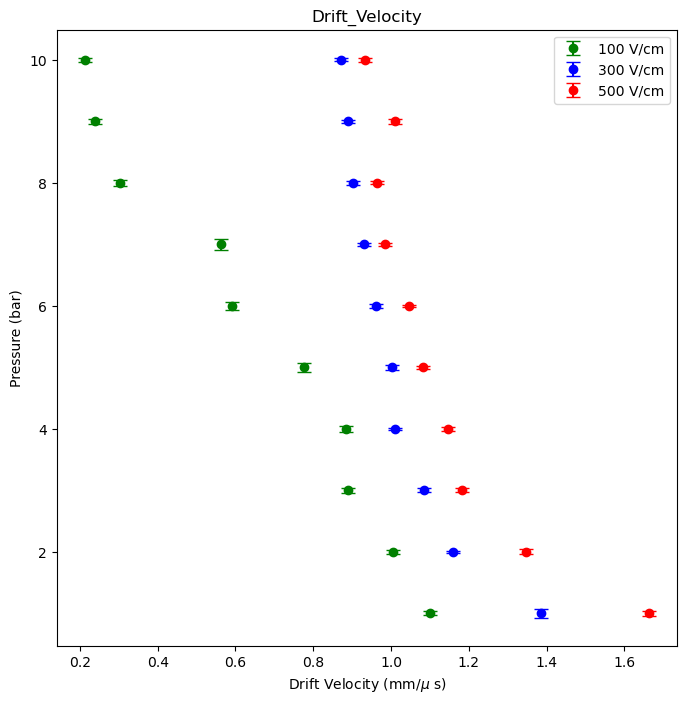

In [8]:
# Plot drift vel
pylab.figure(figsize=(8,8))
pylab.title("Drift_Velocity")
pylab.errorbar(DriftVel[100],(Pressure/750.062),DriftVelErr[100],capsize=5,fmt='o',color="g",label="100 V/cm")
pylab.errorbar(DriftVel[300],(Pressure/750.062),DriftVelErr[300],capsize=5,fmt='o',color="b",label="300 V/cm")
pylab.errorbar(DriftVel[500],(Pressure/750.062),DriftVelErr[500],capsize=5,fmt='o',color="r",label="500 V/cm")

pylab.ylabel("Pressure (bar)")
pylab.xlabel(r"Drift Velocity (mm/$\mu$ s)")
pylab.legend()

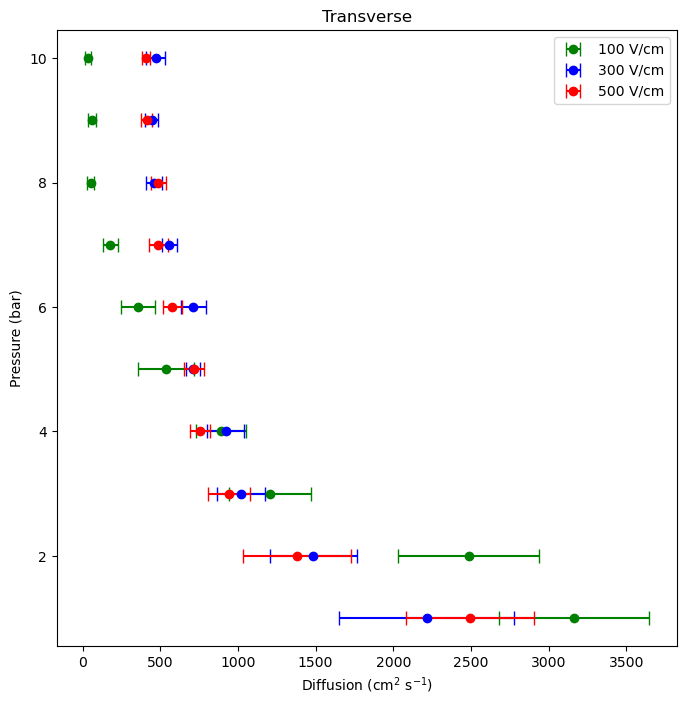

In [9]:
# Plot Diffusion in Einstein units
pylab.figure(figsize=(8,8))
pylab.title("Transverse")
pylab.errorbar(x=DT[100],y=Pressure/750.062,xerr=DT_err[100],capsize=5,fmt='o',color="g",label="100 V/cm")
pylab.errorbar(x=DT[300],y=(Pressure/750.062),xerr=DT_err[300],capsize=5,fmt='o',color="b",label="300 V/cm")
pylab.errorbar(x=DT[500],y=(Pressure/750.062),xerr=DT_err[500],capsize=5,fmt='o',color="r",label="500 V/cm")
pylab.ylabel("Pressure (bar)")
pylab.xlabel(r"Diffusion (cm$^2$ s$^{-1}$)")
pylab.legend()

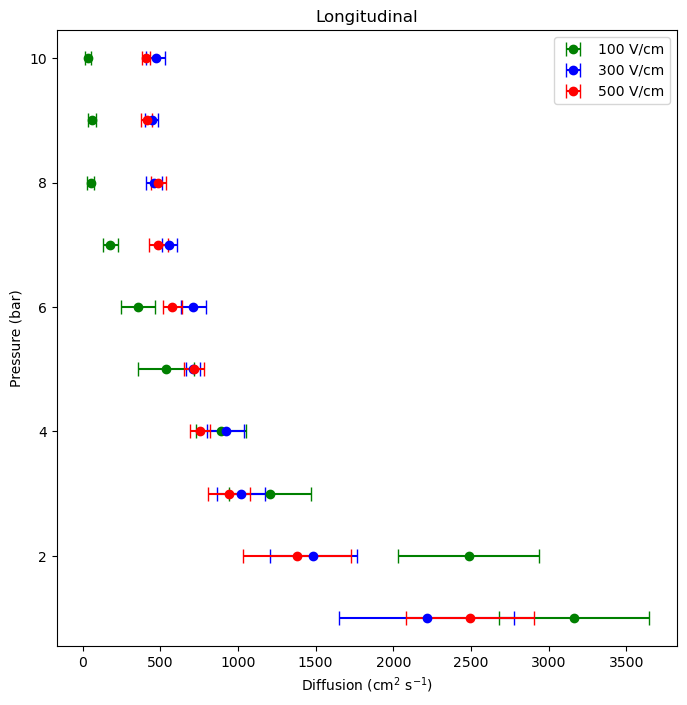

In [10]:
pylab.figure(figsize=(8,8))
pylab.title("Longitudinal")
pylab.errorbar(x=DL[100],y=(Pressure/750.062),xerr=DL_err[100],capsize=5,fmt='o',color="g",label="100 V/cm")
pylab.errorbar(x=DL[300],y=(Pressure/750.062),xerr=DL_err[300],capsize=5,fmt='o',color="b",label="300 V/cm")
pylab.errorbar(x=DL[500],y=(Pressure/750.062),xerr=DL_err[500],capsize=5,fmt='o',color="r",label="500 V/cm")
pylab.ylabel("Pressure (bar)")
pylab.xlabel(r"Diffusion (cm$^2$ s$^{-1}$)")
pylab.legend()